# Proprocessing MNE

## import packages and data

In [1]:
import numpy as np 
import mne 
from mne.preprocessing import ICA 
from mne.time_frequency import tfr_morlet
import os
%matplotlib inline

In [2]:
import matplotlib

In [3]:
print(matplotlib.__version__)

3.7.1


In [4]:
os.getcwd()

'/Users/zhengyuanrui/EEG-Prepro-learn/script'

In [5]:
data_path = "../data/eeglab_data.set"
locs_info_path = "../data/eeglab_chan32.locs"
raw = mne.io.read_raw_eeglab(data_path, preload=True) 

Reading /Users/zhengyuanrui/EEG-Prepro-learn/script/../data/eeglab_data.fdt
Reading 0 ... 30503  =      0.000 ...   238.305 secs...


In [6]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FPz, EOG1, F3, Fz, F4, EOG2, FC5, FC1, FC2, FC6, T7, C3, C4, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>


In [7]:
montage = mne.channels.read_custom_montage(locs_info_path)
new_chan_names = np.loadtxt(locs_info_path, dtype=str, usecols=3)
old_chan_names = raw.info["ch_names"] 
chan_names_dict = {old_chan_names[i]:new_chan_names[i] for i in range(32)} 
# update names
raw.rename_channels(chan_names_dict)
# import montage 
raw.set_montage(montage) 

<RawEEGLAB | eeglab_data.fdt, 32 x 30504 (238.3 s), ~7.5 MB, data loaded>

In [8]:
chan_types_dict = {"EOG1":"eog", "EOG2":"eog"} 
raw.set_channel_types(chan_types_dict) 

<RawEEGLAB | eeglab_data.fdt, 32 x 30504 (238.3 s), ~7.5 MB, data loaded>

In [9]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FPz, EOG1, F3, Fz, F4, EOG2, FC5, FC1, FC2, FC6, T7, C3, C4, Cz, ...
 chs: 30 EEG, 2 EOG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>


## plot channel

Using matplotlib as 2D backend.


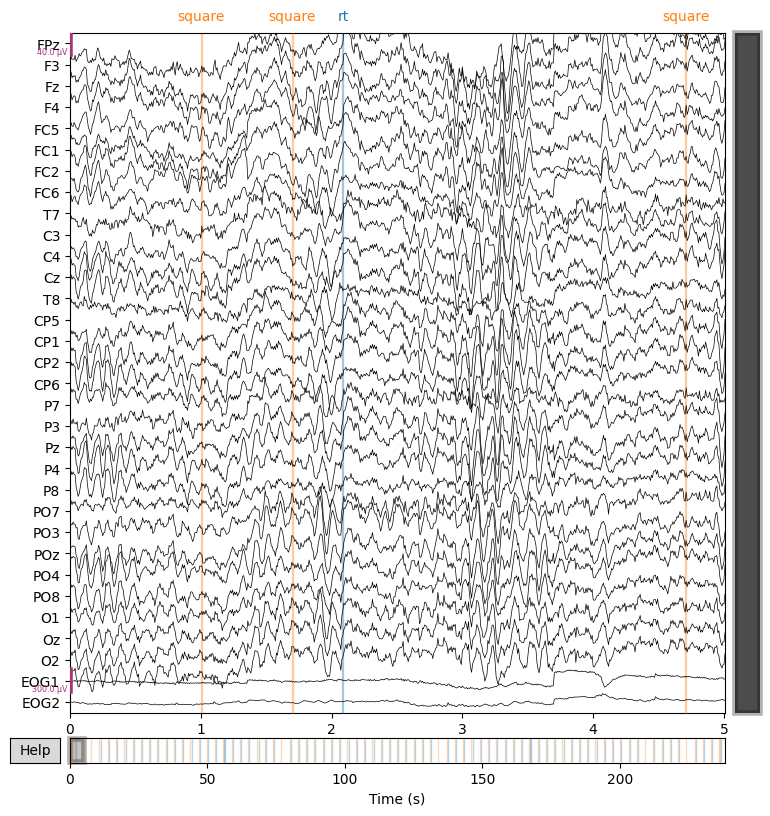

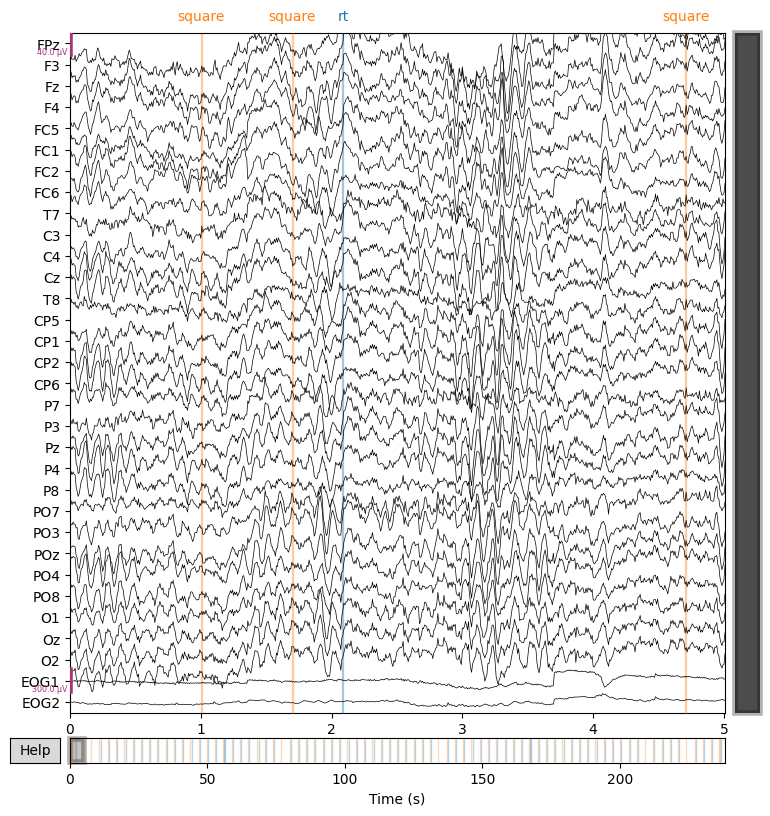

In [10]:
raw.plot(duration=5, n_channels=32, clipping=None) 

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


/Users/zhengyuanrui/anaconda3/envs/MNE/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


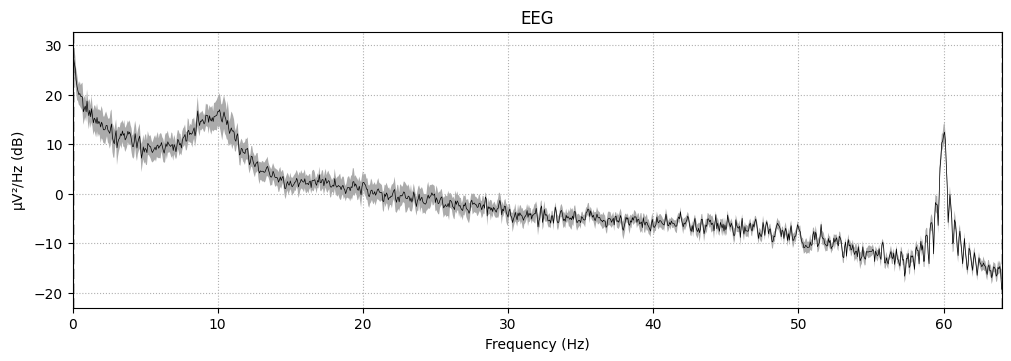

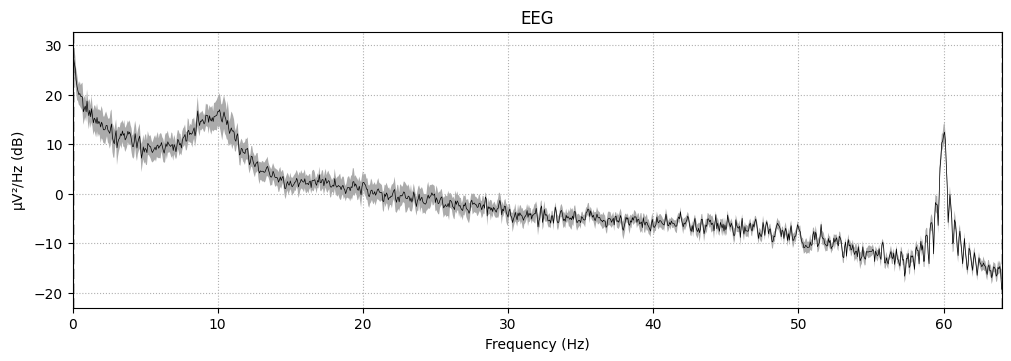

In [11]:
raw.plot_psd(average=True)

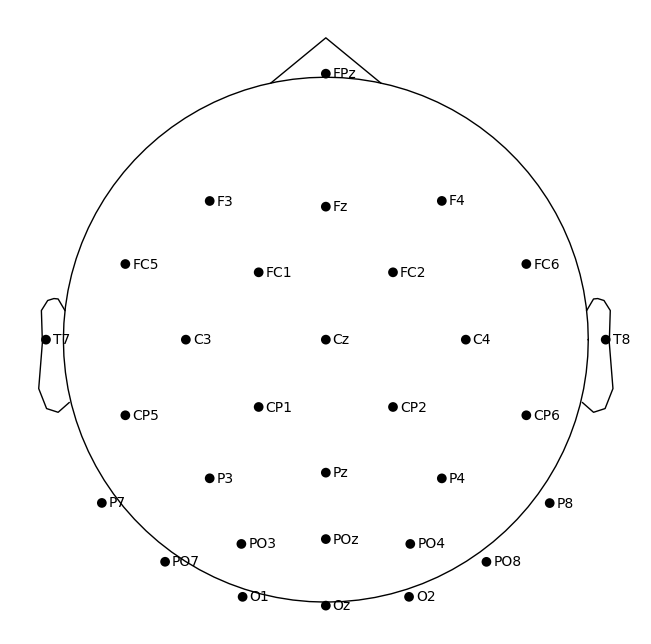

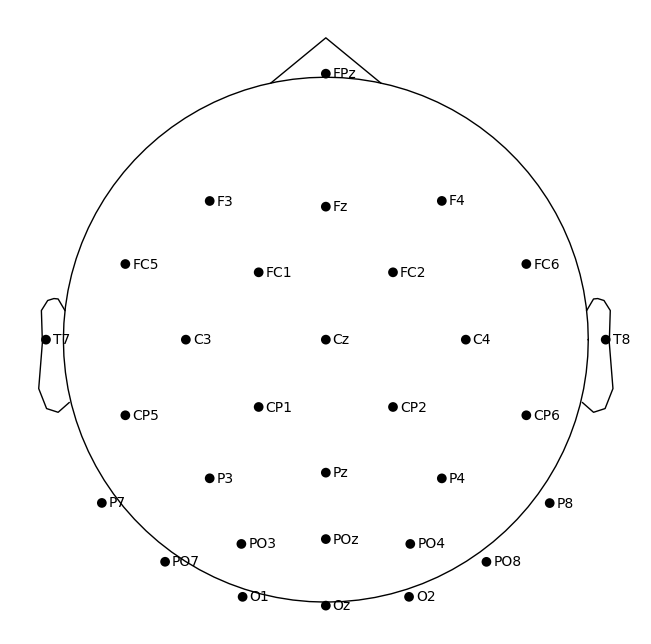

In [12]:
raw.plot_sensors(ch_type='eeg', show_names=True) 

Effective window size : 16.000 (s)


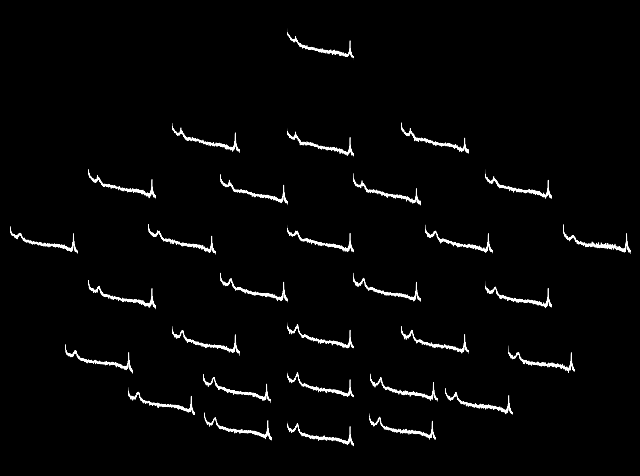

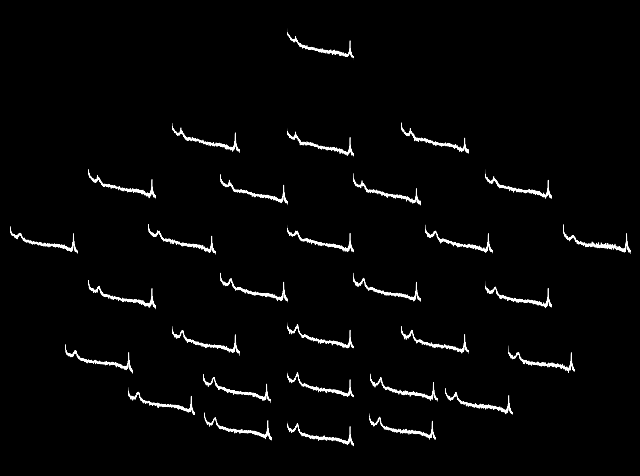

In [13]:
raw .compute_psd().plot_topo()

## filter

In [14]:
raw = raw.filter(l_freq=0.1, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4225 samples (33.008 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


/Users/zhengyuanrui/anaconda3/envs/MNE/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


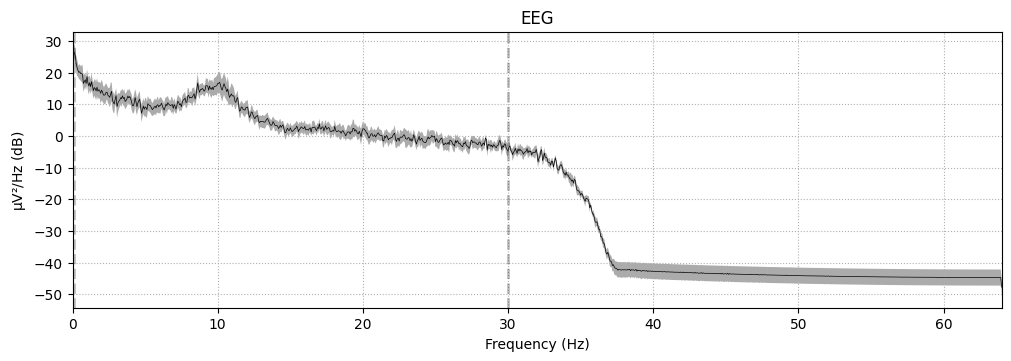

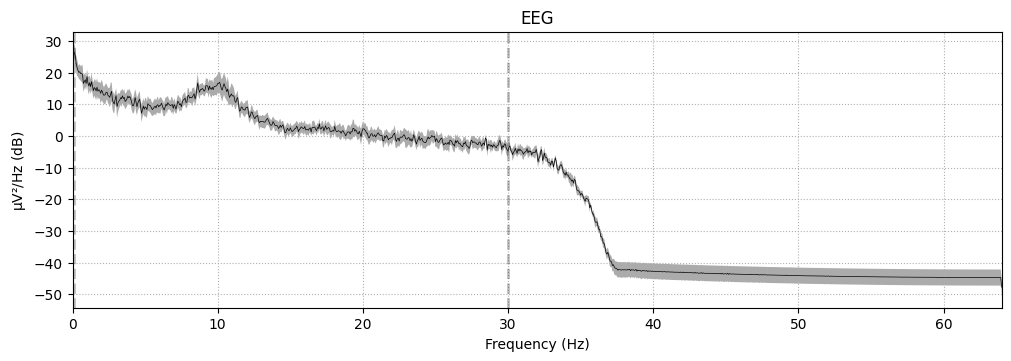

In [15]:
raw.plot_psd(average=True)

## re-reference

In [16]:
raw.set_eeg_reference('average', projection=True).apply_proj()

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawEEGLAB | eeglab_data.fdt, 32 x 30504 (238.3 s), ~7.5 MB, data loaded>

## ICA

In [17]:
ica = ICA(max_iter='auto').fit(raw)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by non-zero PCA components: 29 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 3.1s.


    Applying projection operator with 1 vector (pre-whitener application)
Creating RawArray with float64 data, n_channels=31, n_times=30504
    Range : 0 ... 30503 =      0.000 ...   238.305 secs
Ready.


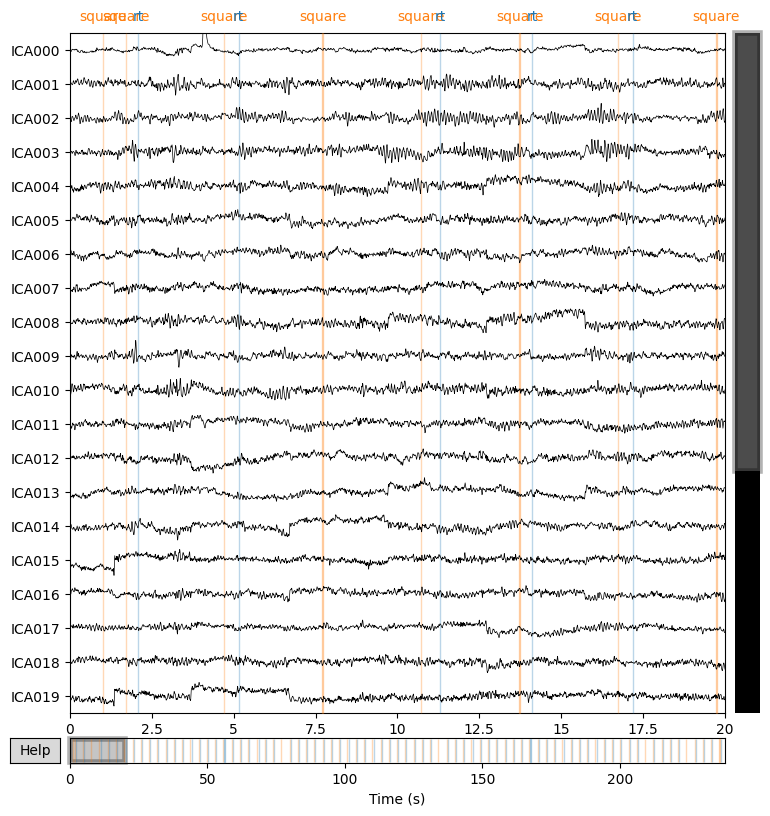

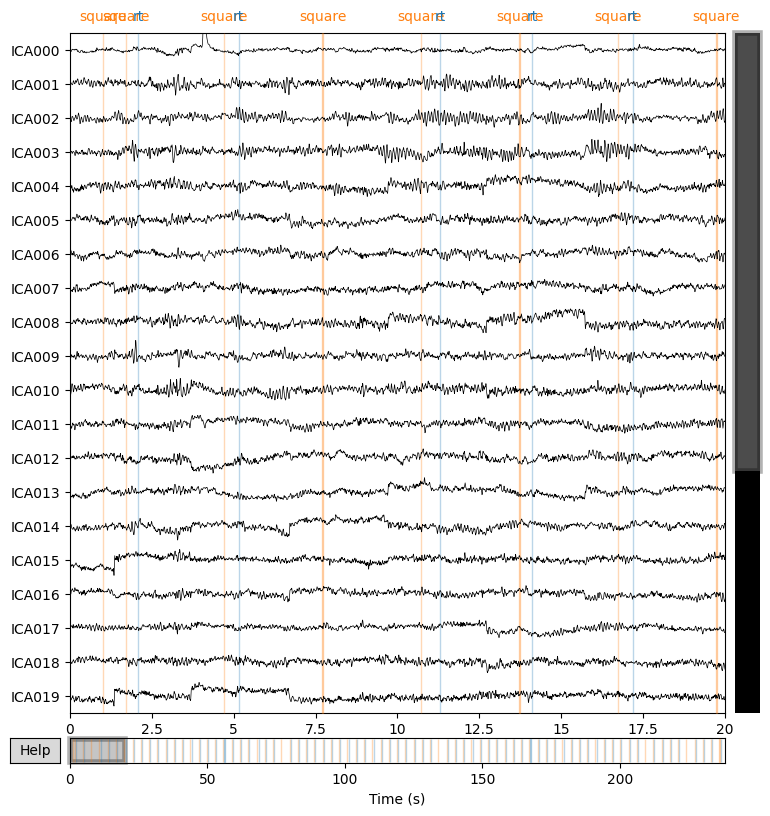

In [18]:
ica.plot_sources(raw)

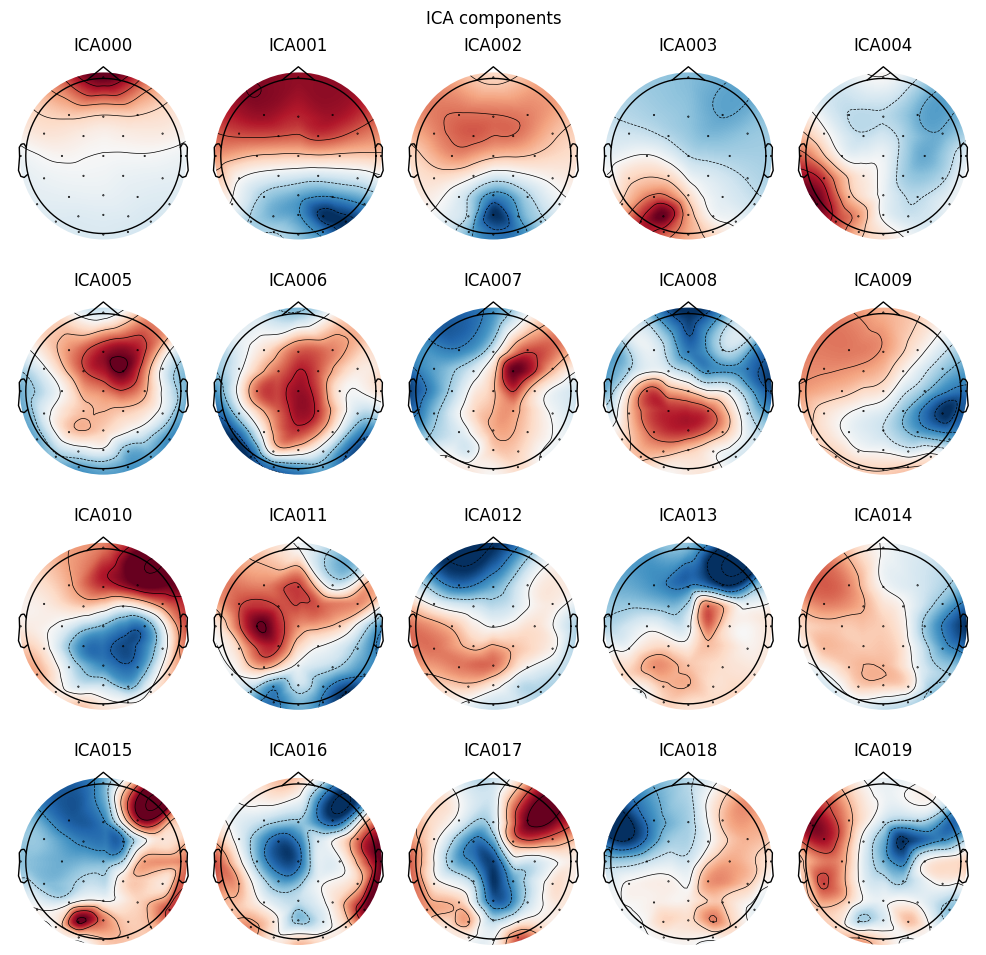

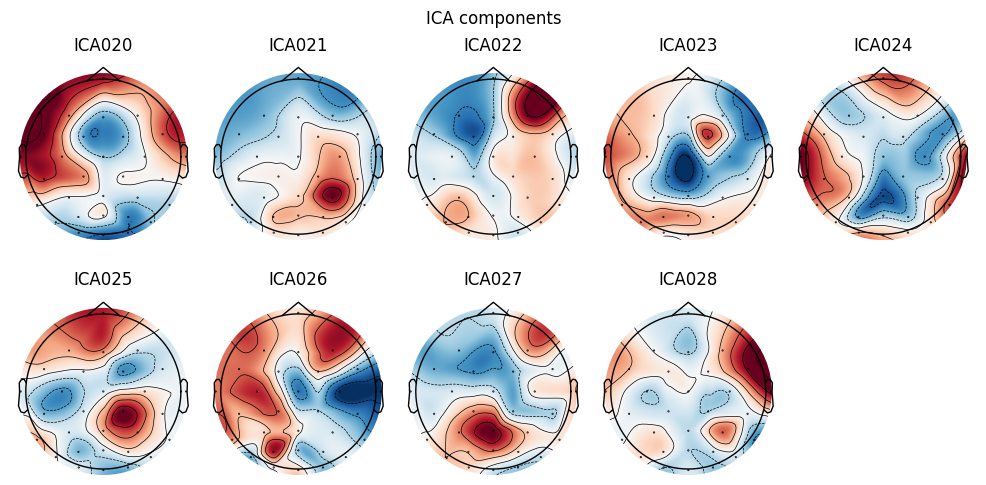

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 9 Axes>]

In [19]:
ica.plot_components()

## epoch

In [20]:
print(raw.annotations)

<Annotations | 154 segments: rt (74), square (80)>


In [21]:
events, event_id = mne.events_from_annotations(raw) 

Used Annotations descriptions: ['rt', 'square']


In [22]:
print(events.shape, event_id) 

(154, 3) {'rt': 1, 'square': 2}


In [23]:
#baseline
epochs = mne.Epochs(raw, events, event_id=2, tmin=-1, tmax=2, baseline=(-1, 0),  preload=True) 

Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 80 events and 385 original time points ...
0 bad epochs dropped


In [24]:
print(epochs)

<Epochs |  80 events (all good), -1 – 2 s, baseline -1 – 0 s, ~7.6 MB, data loaded,
 '2': 80>


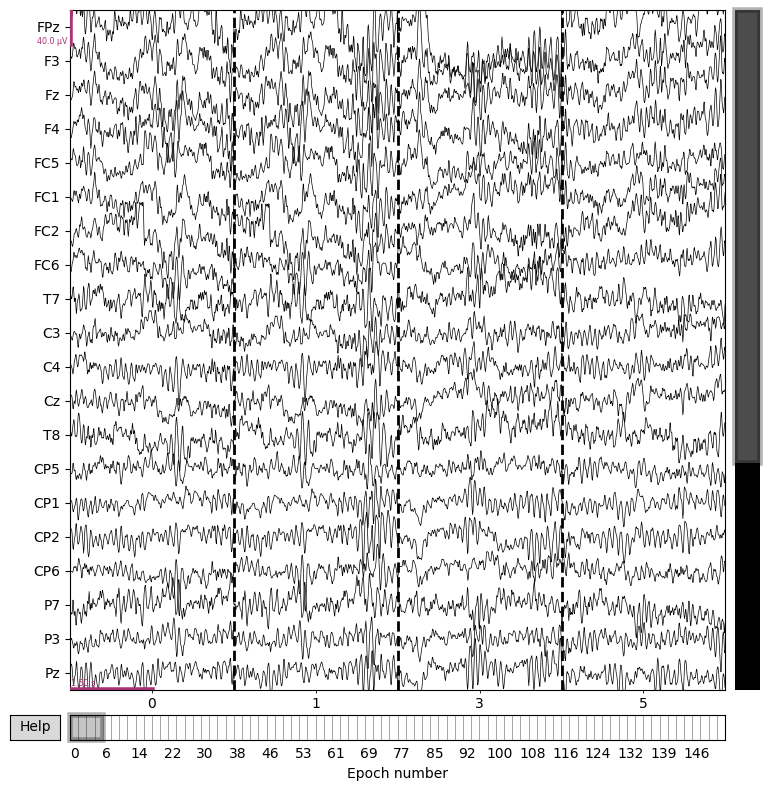

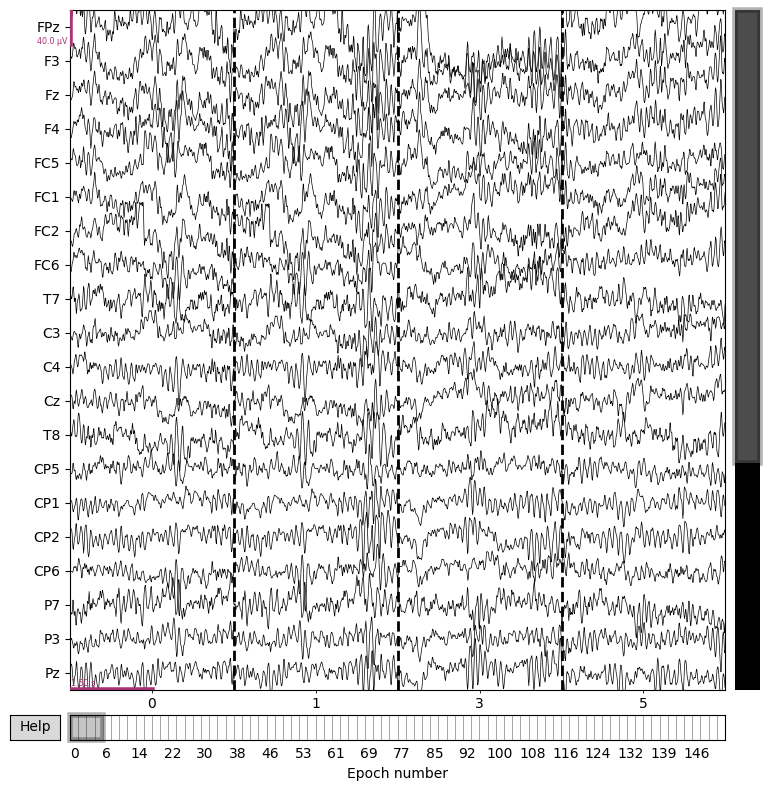

In [25]:
epochs.plot(n_epochs=4)

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


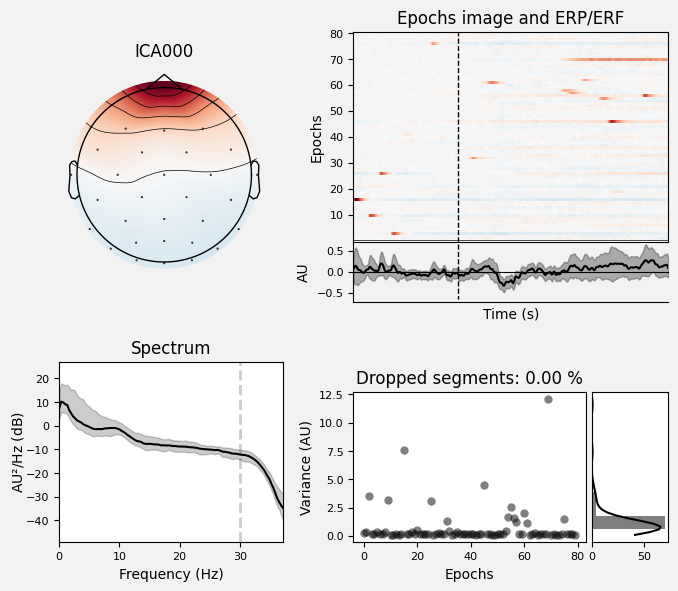

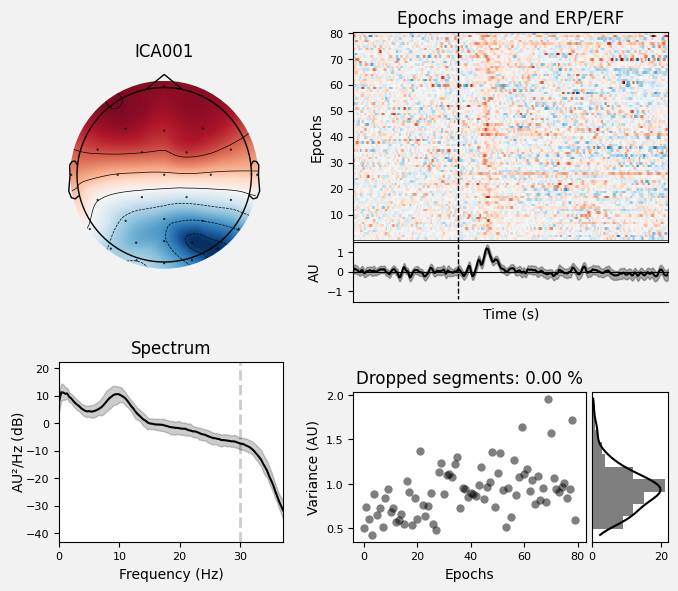

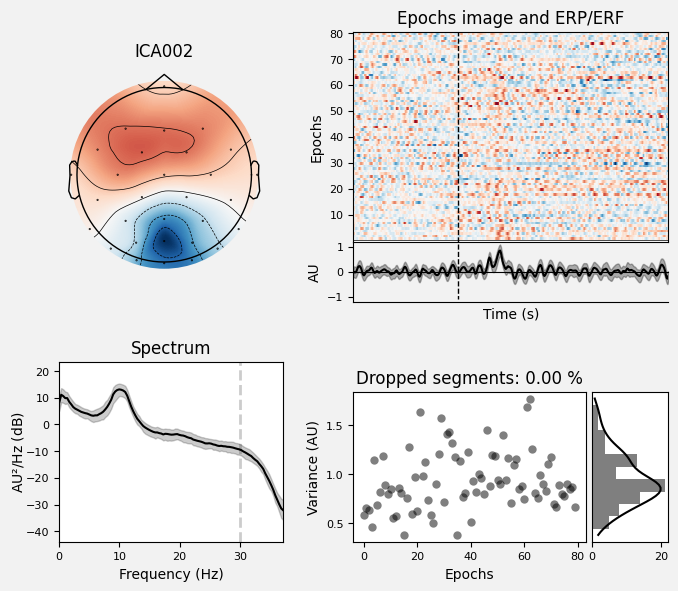

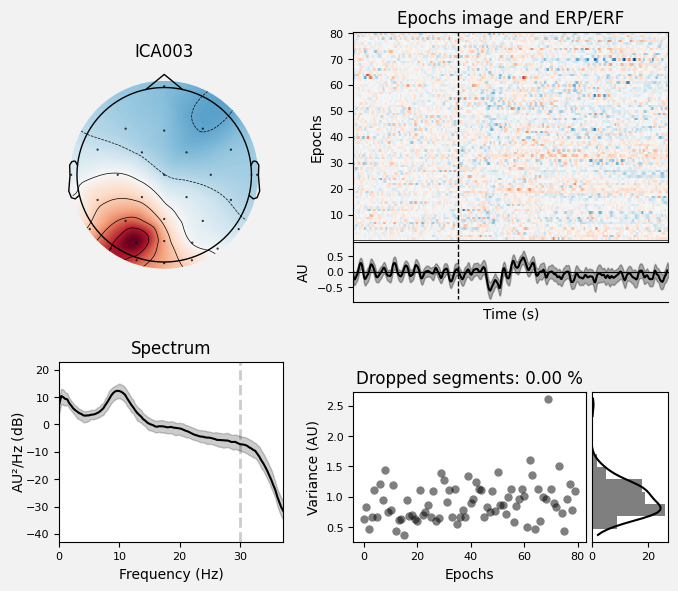

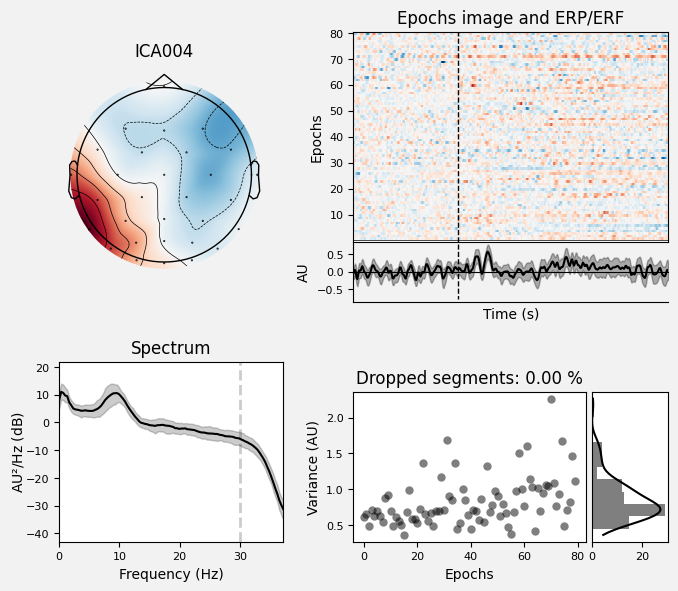

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [26]:
ica.plot_properties(epochs)

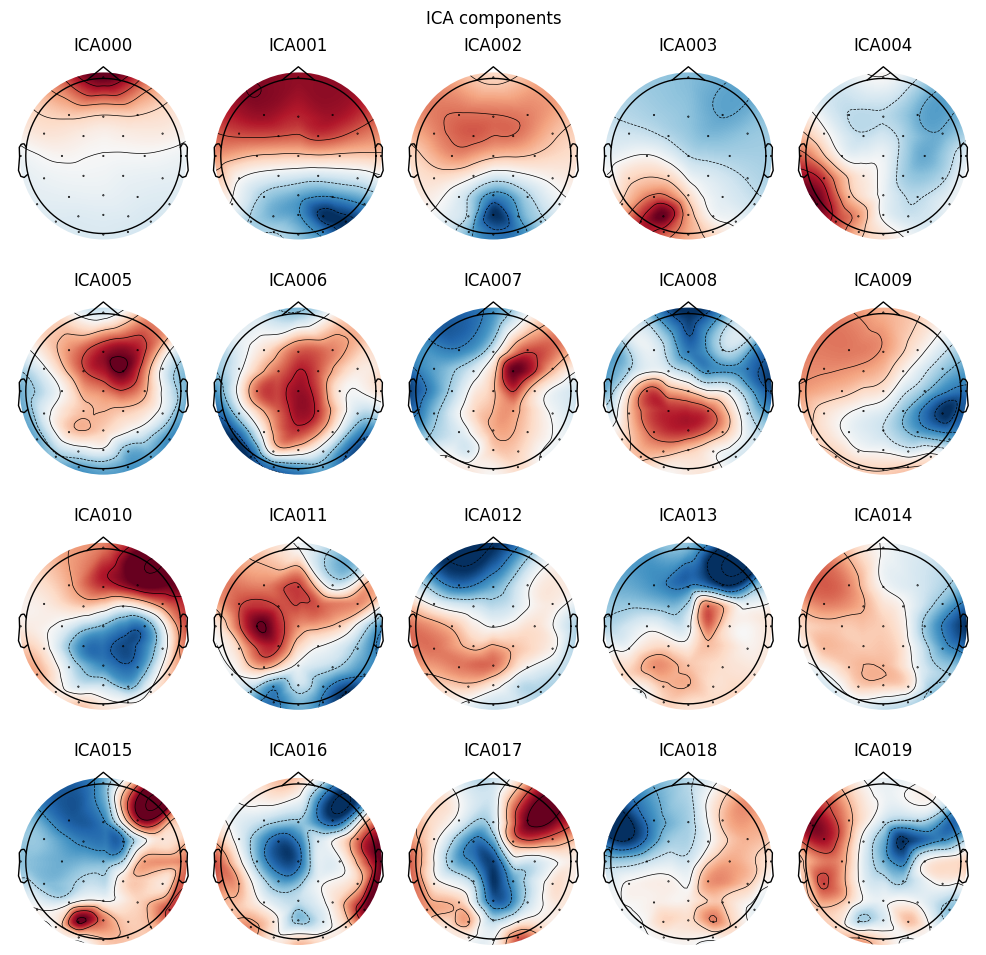

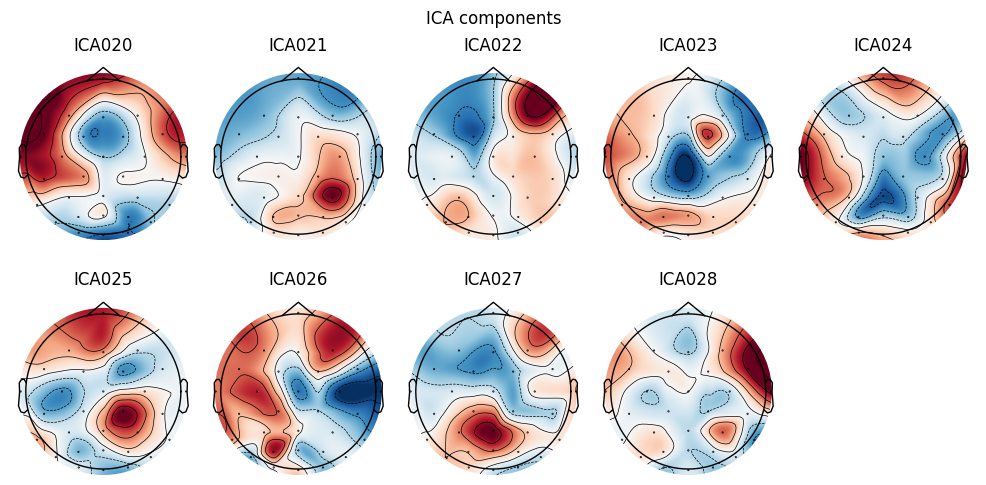

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 9 Axes>]

In [27]:
ica.plot_components() 

In [28]:
eog_inds, scores = ica.find_bads_eog(epochs)

Using EOG channels: EOG1, EOG2
    Applying projection operator with 1 vector (pre-whitener application)
    Applying projection operator with 1 vector (pre-whitener application)


In [29]:
ica.exclude = eog_inds

In [30]:
ica.apply(epochs) 

Applying ICA to Epochs instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (29 components)
    Zeroing out 0 ICA components
    Projecting back using 30 PCA components


/var/folders/06/d73mk4410yg1bfrx52fmy4jw0000gn/T/ipykernel_37262/2127421951.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(epochs)


<Epochs |  80 events (all good), -1 – 2 s, baseline -1 – 0 s, ~7.6 MB, data loaded,
 '2': 80>

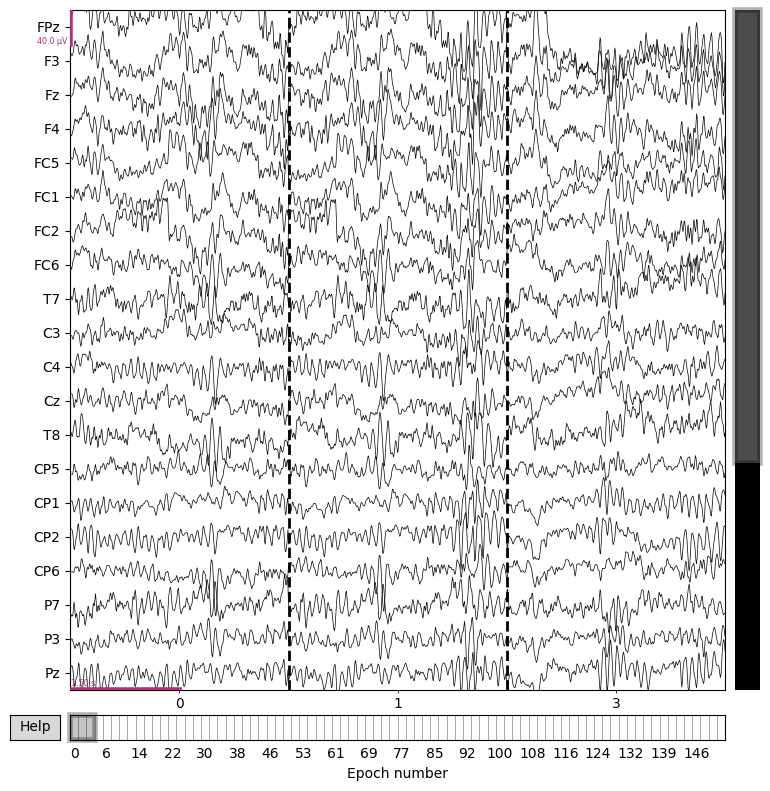

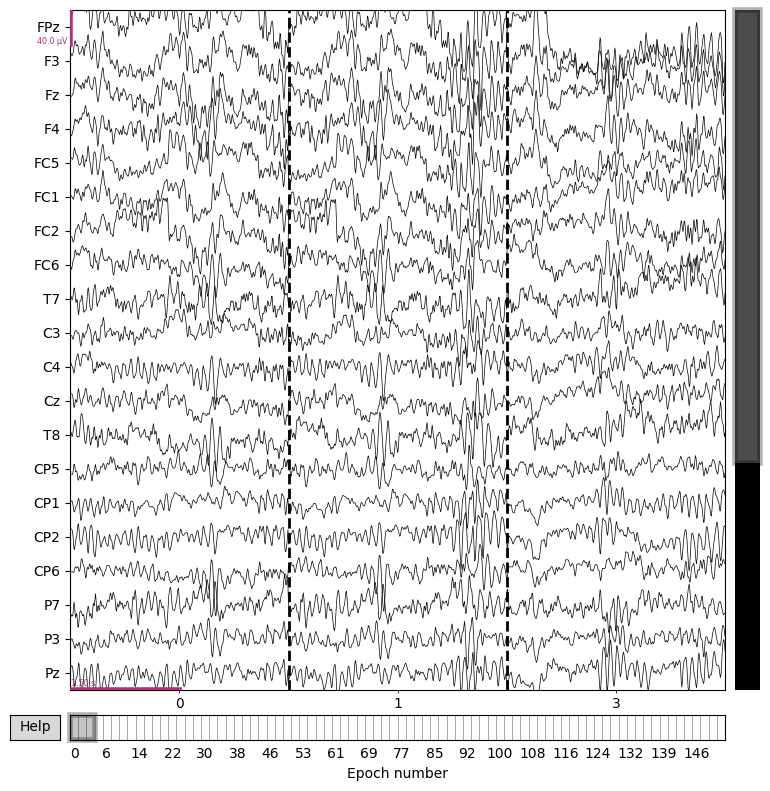

In [31]:
epochs.plot(n_epochs=3)

    Using multitaper spectrum estimation with 7 DPSS windows


Averaging across epochs...


/Users/zhengyuanrui/anaconda3/envs/MNE/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


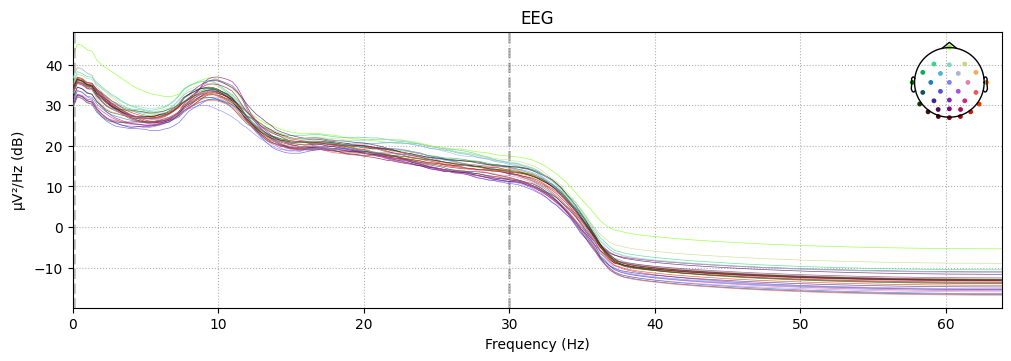

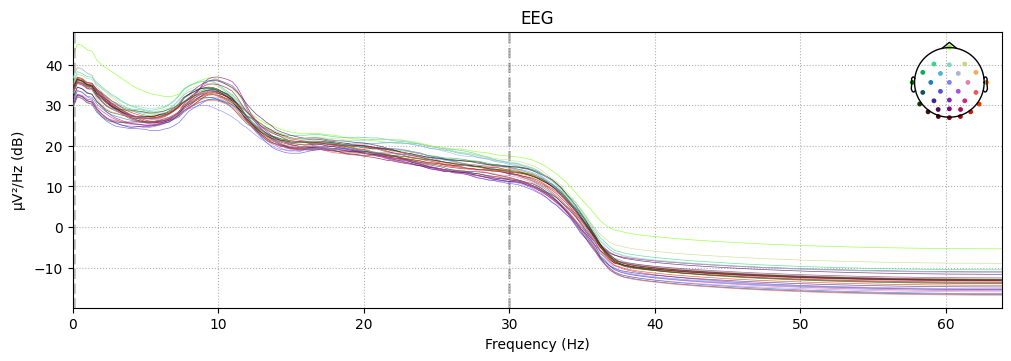

In [32]:
epochs.compute_psd().plot()

## average

In [33]:
evoked = epochs.average()

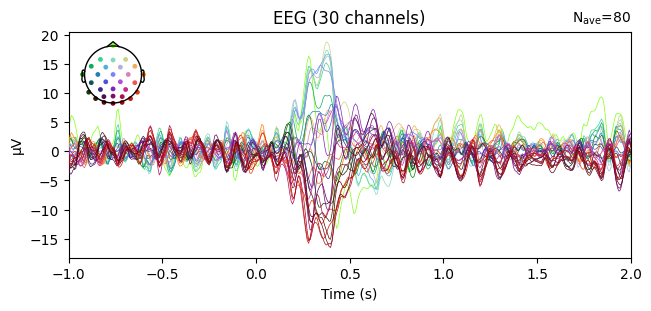

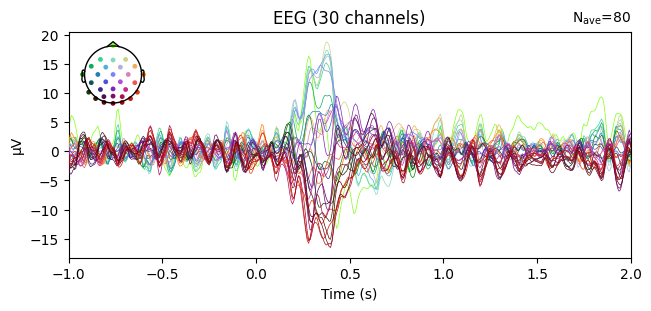

In [34]:
evoked.plot()

Projections have already been applied. Setting proj attribute to True.


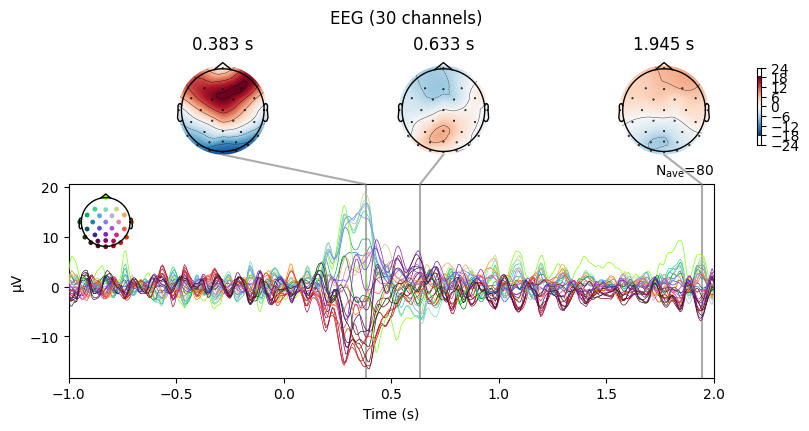

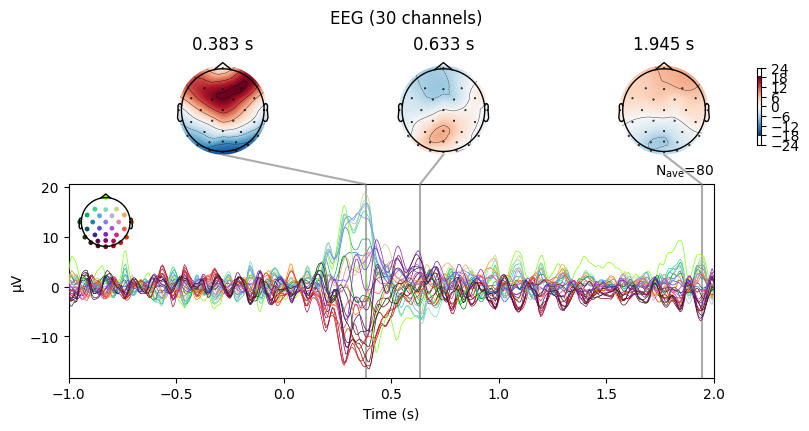

In [35]:
evoked.plot_joint()

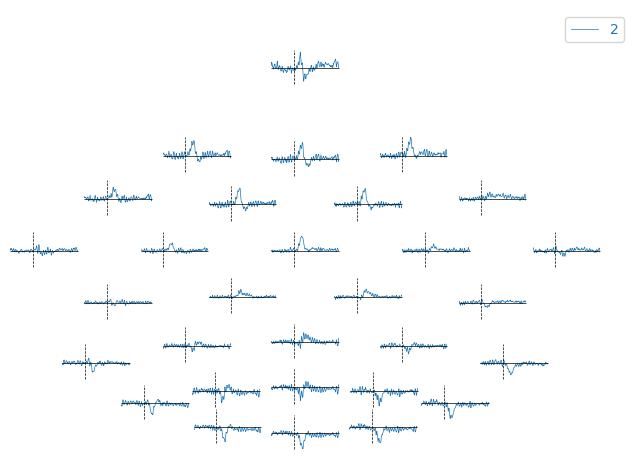

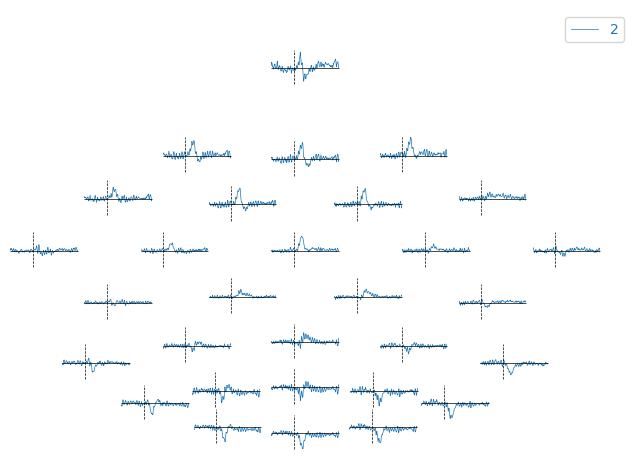

In [36]:
evoked.plot_topo()